<a href="https://colab.research.google.com/github/Aakriti555/Neural-Network-and-Deep-learning-Assignment-/blob/main/practical_A4_Aakriti_Banjara_CE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aakriti Banjara ##
## CE-2020 ##

In this lab, we will describe how RNN is used in model and how it remembers the input.

# Recurrent neural networks #

RNNs are widely applied for use cases that involve sequential data, such as time series, text, audio, speech, video, weather, and much more. They have been greatly used in various natural language processing (NLP) tasks, such as language translation, sentiment analysis, text generation, and so on.


RNN predict output not only based on the current input, but also on the previous hidden state. The previous hidden state acts like a memory and it captures the context of the sentence. With this context and the current input, we can predict the relevant word.

To predict the blank word on the given sentence  "The sun rises in the ____"



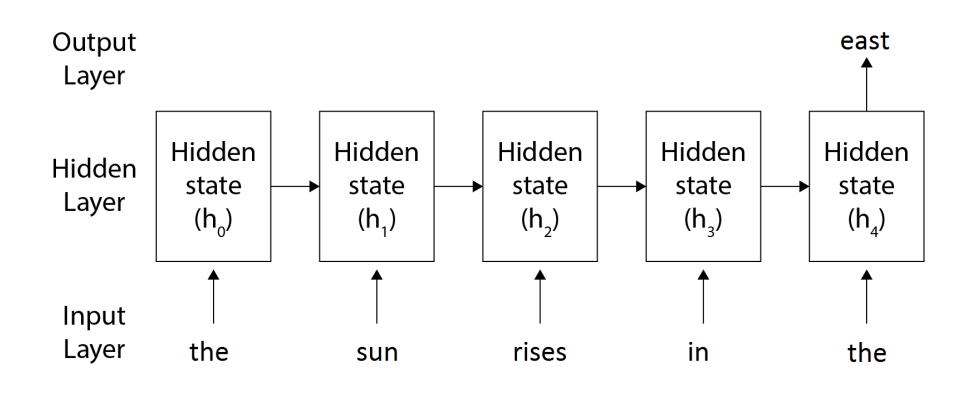

# Forward propagation in RNNs #

RNN uses forward propagation to predict the output.

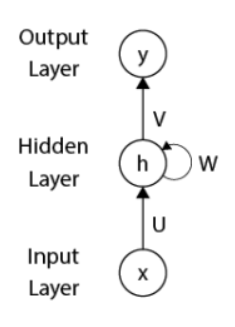

The preceding figure illustrates the following:
- U represents the input to hidden layer weight matrix
- W represents the hidden to hidden layer weight matrix
- V  represents the hidden to output layer weight matrix

The hidden state \( h \) at a time step \( t \) can be computed as follows:

$
h_t = \tanh(Ux_t + Wh_{t-1})
$



The output at a time step t can be computed as follows:

$ y_t' = softmax(Vh_t)$

That is, output at a time step, t = softmax (hidden to output layer weight x hidden state at a time t)

RNNs can be shown in the following figure:

The following diagram shows how forward propagation works in an unrolled version of an RNN:
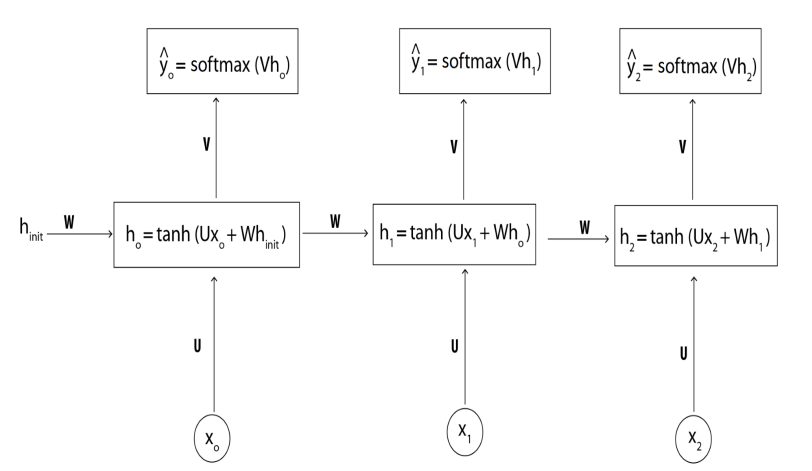

the output,Y_0 , is predicted based on the current input, x_3
 and the previous hidden state, which is an initial hidden state h_int using the following formula:

$ h_t=tanh(Ux0+Whtinit)  $

$ y_0=softmax(Vh0)$

Similarly, look at how the output, x^2 , is computed. It takes the current input, x_1 , and the previous hidden state:

$ h_1=tanh(Ux_1+Wht_{0}) $

$ y_1=softmax(Vh_i)$

Thus, in forward propagation to predict the output, RNN uses the current input and the previous hidden state.

In [ ]:
# Initialize all the weights, U, W, and V, by randomly drawing from the uniform distribution:
import numpy as np

# define dimensions

input_dim = 10
hidden_dim = 5
output_dim = 3

U = np.random.uniform(-np.sqrt(1.0 / input_dim), np.sqrt(1.0 / input_dim),
(hidden_dim, input_dim))
W = np.random.uniform(-np.sqrt(1.0 / hidden_dim), np.sqrt(1.0 / hidden_dim),
(hidden_dim, hidden_dim))
V = np.random.uniform(-np.sqrt(1.0 / hidden_dim), np.sqrt(1.0 / hidden_dim),
(output_dim, hidden_dim))

# Optional: Print the shapes of the initialized matrices
print("Shape of U:", U.shape)
print("Shape of W:", W.shape)
print("Shape of V:", V.shape)

Shape of U: (5, 10)
Shape of W: (5, 5)
Shape of V: (3, 5)


In [ ]:
# Define the number of time steps, which will be the length of our input sequence, x , hidden state , outputs :
x = np.random.rand(5, input_dim)
num_time_steps = x.shape[0]

hidden_state = np.zeros((num_time_steps + 1, hidden_dim))

hidden_state[-1] = np.zeros(hidden_dim)

YHat = np.zeros((num_time_steps, output_dim))

In [ ]:
# Define the softmax function
def softmax(z):
    exp_z = np.exp(z - np.max(z))  # Stability improvement
    return exp_z / np.sum(exp_z, axis=0)

# For every time step, we perform the following:
for t in np.arange(num_time_steps):
    if t == 0:
        hidden_state[t] = np.tanh(U.dot(x[t]))  # Use x[t] directly if it's the input
    else:
        hidden_state[t] = np.tanh(U.dot(x[t]) + W.dot(hidden_state[t - 1]))
    YHat[t] = softmax(V.dot(hidden_state[t]))

# Optional: Print the final hidden states and output predictions
print("Final hidden states:")
print(hidden_state)
print("Output predictions (YHat):")
print(YHat)


Final hidden states:
[[-0.41369028  0.14583505 -0.61854592 -0.13779911 -0.55295866]
 [-0.24877286  0.03166736 -0.75984161 -0.53686969 -0.24254364]
 [ 0.1120512  -0.24393681 -0.82214107 -0.32154326 -0.33743204]
 [ 0.13027949 -0.3256817  -0.70408548 -0.38600814 -0.12052199]
 [ 0.0878281  -0.36184878 -0.59567287 -0.21577589 -0.378223  ]
 [ 0.          0.          0.          0.          0.        ]]
Output predictions (YHat):
[[0.44032224 0.35773697 0.20194079]
 [0.44374512 0.32338925 0.23286563]
 [0.39241341 0.31941219 0.2881744 ]
 [0.37376972 0.30351842 0.32271186]
 [0.36362864 0.31837272 0.31799865]]


# Backpropagation through time #
Here, we compute the loss, L at each time step, t, to determine how ell the RNN has predicted the output. We use the cross-entropy loss as loss function.
L_t = -Y_t log(Y_t')

 Y_t is the actual output, and Y_t' is the predicted output at a time step t.

The final loss is the sum of the loss at all the time steps. Suppose we have T-1 layers, then:

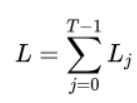

As shown in the following figure, the final loss is obtained by the sum of loss at all the time steps:

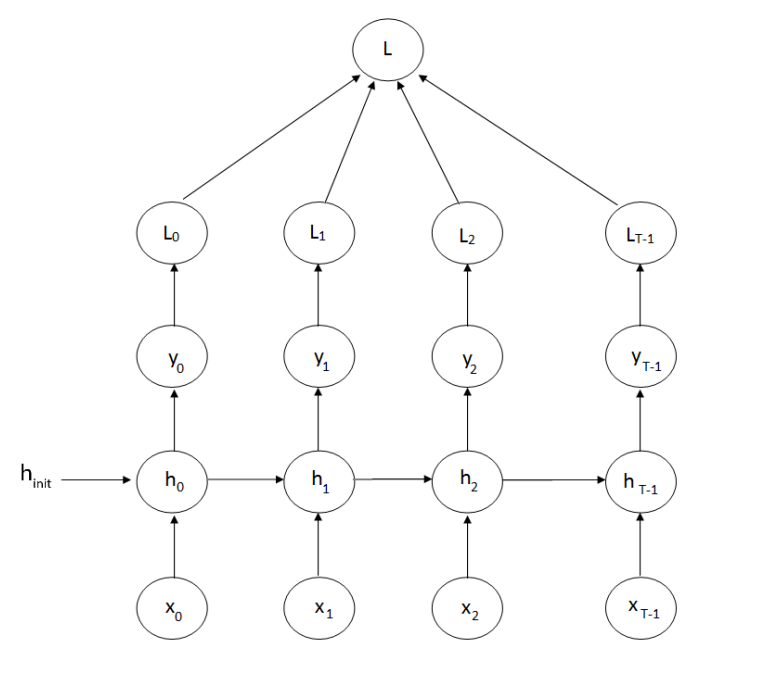

We need to find optimal values for all of these three weights to minimize the loss. WE calculate the gradients of the loss fucntion with respect to all the weights:

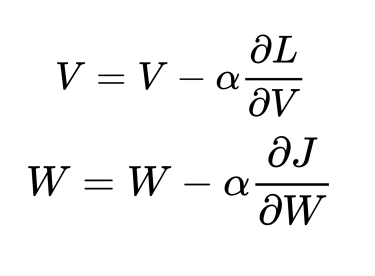
![image-4.png](attachment:image-4.png)



# The vanishing and exploding gradient problem #

While computing the derivatives of loss with respect to W and U, we saw that we have to traverse all the way back to the first hidden state, as each hidden state at a time t is dependent on its previous hidden state at a time t-1.

For instance, the gradient of loss L1 with respect to W is given as: მLo/მW = (მLo/მყo) (მho/ მყo) (მho/ მW)

As shown in the following figure, to compute the derivative of L1, we need to go all the way back to the initial hidden state ẞ1, as each hidden state is dependent on its previous hidden state:


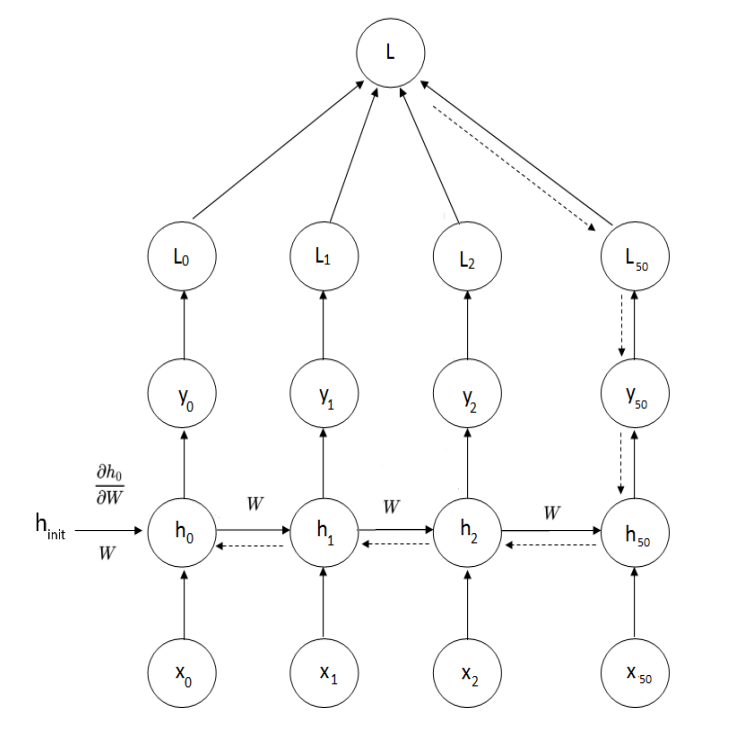


Every time we move backward,
we compute the derivative of bh. A derivative of tanh is bounded to 1. We
know that any two values between 0 and 1, when multiplied with each other
will give us a smaller number. We usually initialize the weights of the network
to a small number. Thus, when we multiply the derivatives and weights while
backpropagating, we are essentially multiplying smaller numbers.
So, when we multiply smaller numbers at every step while moving backward,
our gradient becomes infinitesimally small and leads to a number that the
computer can't handle; this is called the **vanishing gradient problem**.

#  Generating song lyrics using RNNs #

We have learned enough about RNNs; now, we will look at how to generate
song lyrics using RNNs. To do this, we simply build a character-level RNN,
meaning that on every time step, we predict a new character.

Let's consider a small sentence, What a beautiful **d**.

At the first time step, the RNN predicts a new character as a. The sentence
will be updated to, What a beautiful **da**.

At the next time step, it predicts a new character as y, and the sentence
becomes, What a beautiful **day**.

In this manner, we predict a new character at each time step and generate a
song. Instead of predicting a new character every time, we can also predict a
new word every time, which is called **word level RNN**. For simplicity, let's
start with a **character level RNN.**

But how does RNN predicts a new character on each time step? Let's
suppose at a time step t=0, we feed an input character say x. Now the RNN
predicts the next character based on the given input character x. To predict
the next character, it predicts the probability of all the characters in our
vocabulary to be the next character. Once we have this probability
distribution we randomly select the next character based on this probability.

For instance, as shown in the following figure, let's suppose that our
vocabulary contains four characters L, O, V, and E; when we feed the
character L as an input, RNN computes the probability of all the words in the
vocabulary to be the next character:

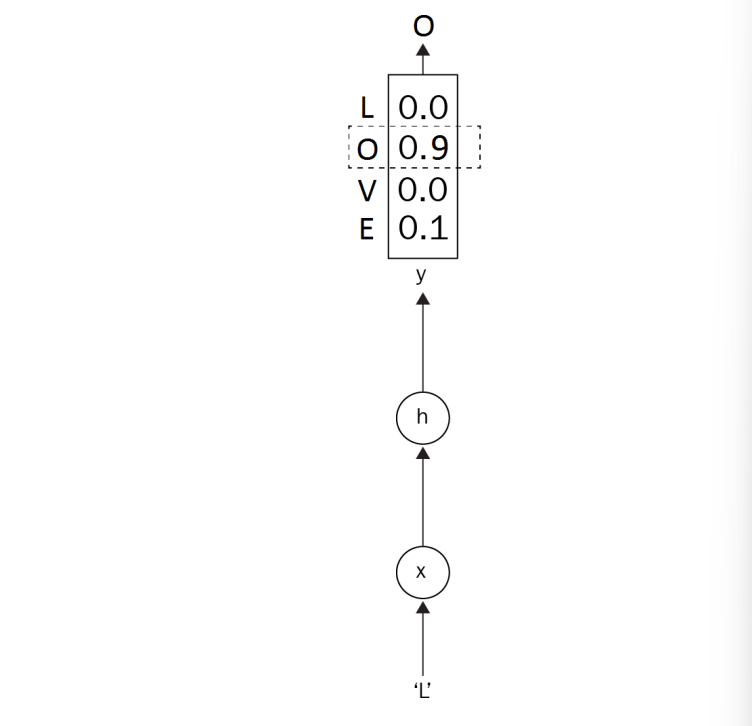

So, on each time step, we feed the predicted character from the previous time
step and the previous hidden state as input and predict the next character
shown as follows:

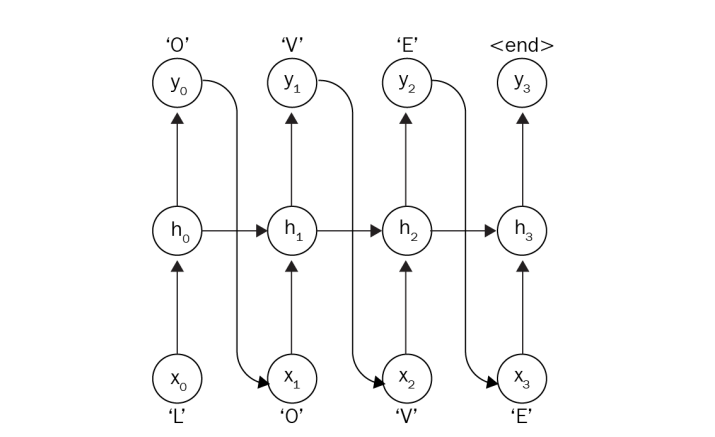

As you can see in the preceding figure, at time step t=2, V is passed as an
input, and it predicts the next character as E. But this does not mean that
every time character V is sent as an input it should always return E as output.
Since we are passing input along with the previous hidden state, the RNN has
the memory of all the characters it has seen so far.
So, the previous hidden state captures the essence of the previous input
characters, which are L and O. Now, with this previous hidden state and the
input V, the RNN predicts the next character as E.

### Implementing in TensorFlow
Now, we will look at how to build the RNN model in TensorFlow to
generate song lyrics. The dataset and also the complete code used in this
section

Now, we will look at how to build the RNN model in TensorFlow to
generate song lyrics. The dataset and also the complete code used in this
section with step by step explanation is available on GitHub at http://bit.ly/2
QJttyp. After downloading, unzip the archive, and place the songdata.csv in the
data folder.

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import random
import numpy as np
import pandas as pd
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
tf.logging.set_verbosity(tf.logging.ERROR)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('D:\Coursera_Machineleraning_fullcourse\data\songdata.csv')

In [ ]:
df.tail(10)

,artist,song,link,text
57640,Zebrahead,The Setup,/z/zebrahead/the+setup_10198494.html,Lie to me \nTell me that everything will be a...
57641,Ziggy Marley,Freedom Road,/z/ziggy+marley/freedom+road_20531174.html,"That's why I'm marching, yes, I'm marching, \..."
57642,Ziggy Marley,Friend,/z/ziggy+marley/friend_20673508.html,[Chorus] \nI wanna thank you for the things y...
57643,Ziggy Marley,G7,/z/ziggy+marley/g7_20531173.html,Seven richest countries in the world \nThem h...
57644,Ziggy Marley,Generation,/z/ziggy+marley/generation_20531171.html,Many generation have passed away \nFighting f...
57645,Ziggy Marley,Good Old Days,/z/ziggy+marley/good+old+days_10198588.html,Irie days come on play \nLet the angels fly l...
57646,Ziggy Marley,Hand To Mouth,/z/ziggy+marley/hand+to+mouth_20531167.html,Power to the workers \nMore power \nPower to...
57647,Zwan,Come With Me,/z/zwan/come+with+me_20148981.html,all you need \nis something i'll believe \nf...
57648,Zwan,Desire,/z/zwan/desire_20148986.html,northern star \nam i frightened \nwhere can ...
57649,Zwan,Heartsong,/z/zwan/heartsong_20148991.html,come in \nmake yourself at home \ni'm a bit ...


In [ ]:
print("Our dataset consists of about 57,650 song lyrics:")
df.shape[0]

Our dataset consists of about 57,650 song lyrics:


57650

In [ ]:
print('We have',len(df['artist'].unique()),'artists')

We have 643 artists


In [ ]:
# The number of songs from each artist is shown as follows:

df['artist'].value_counts()[:10]


artist
Donna Summer        191
Gordon Lightfoot    189
Bob Dylan           188
George Strait       188
Loretta Lynn        187
Cher                187
Alabama             187
Reba Mcentire       187
Chaka Khan          186
Dean Martin         186
Name: count, dtype: int64

In [ ]:
print("On average, we have",df['artist'].value_counts().values.mean(),"songs of each artist")

On average, we have 89.65785381026438 songs of each artist


We have song lyrics in the column text, so we combine all the rows of that column and save it as a text in a variable called data, as follows:

In [ ]:
data = ', '.join(df['text'])

Let's see a few lines of a song:

In [ ]:
data[:369]

"Look at her face, it's a wonderful face  \nAnd it means something special to me  \nLook at the way that she smiles when she sees me  \nHow lucky can one fellow be?  \n  \nShe's just my kind of girl, she makes me feel fine  \nWho could ever believe that she could be mine?  \nShe's just my kind of girl, without her I'm blue  \nAnd if she ever leaves me what could I do, what co"

Since we are building a char-level RNN, we will store all the unique characters in our dataset into a variable called chars; this is basically our vocabulary:

In [ ]:
chars = sorted(list(set(data)))

Store the vocabulary size in a variable called vocab_size:

In [ ]:
vocab_size = len(chars)


Since the neural networks only accept the input in numbers, we need to convert all the characters in the vocabulary to a number.

We map all the characters in the vocabulary to their corresponding index that forms a unique number. We define a char_to_ix dictionary, which has a mapping of all the characters to the index. To get the index by a character, we also define the ix_to_char dictionary, which has a mapping of all the indices to their respective characters:

In [ ]:
char_to_ix = {ch: i for i, ch in enumerate(chars)}
ix_to_char = {i: ch for i, ch in enumerate(chars)}

As you can see in the following code snippet, the character 's' is mapped to an index 68 in the char_to_ix dictionary:

In [ ]:
def one_hot_encoder(index):
    return np.eye(vocab_size)[index]

#### Defining the Network Parameters
We need to define all the network parameters.


In [ ]:
#define the number of units in the hidden layer:
hidden_size = 100

#define the length of the input and output sequence:
seq_length = 25

#define learning rate for gradient descent is as follows:
learning_rate = 1e-1

#set the seed value:
seed_value = 42
tf.set_random_seed(seed_value)
random.seed(seed_value)

## Defining Placeholders

Now, we will define the TensorFlow placeholders. The placeholders for the input and output are as follows:

In [ ]:
inputs = tf.placeholder(shape=[None, vocab_size],dtype=tf.float32, name="inputs")
targets = tf.placeholder(shape=[None, vocab_size], dtype=tf.float32, name="targets")

# Define the placeholder for the initial hidden state:
init_state = tf.placeholder(shape=[1, hidden_size], dtype=tf.float32, name="state")

# Define an initializer for initializing the weights of the RNN:
initializer = tf.random_normal_initializer(stddev=0.1)

#### Defining forward propagation

Let's define the forward propagation involved in the RNN, which is mathematically given as follows:

$$ h_t =  \operatorname{tanh}(U x_t + W h_{t-1} + bh) $$
$$ \hat{y} =  \operatorname{softmax}(V h_t + by) $$

In [ ]:
with tf.variable_scope("RNN") as scope:
    h_t = init_state
    y_hat = []

    for t, x_t in enumerate(tf.split(inputs, seq_length, axis=0)):
        if t > 0:
            scope.reuse_variables()

        #input to hidden layer weights
        U = tf.get_variable("U", [vocab_size, hidden_size], initializer=initializer)

        #hidden to hidden layer weights
        W = tf.get_variable("W", [hidden_size, hidden_size], initializer=initializer)

        #output to hidden layer weights
        V = tf.get_variable("V", [hidden_size, vocab_size], initializer=initializer)

        #bias for hidden layer
        bh = tf.get_variable("bh", [hidden_size], initializer=initializer)

        #bias for output layer
        by = tf.get_variable("by", [vocab_size], initializer=initializer)

        h_t = tf.tanh(tf.matmul(x_t, U) + tf.matmul(h_t, W) + bh)

        y_hat_t = tf.matmul(h_t, V) + by

        y_hat.append(y_hat_t)

Apply softmax on the output and get the probabilities:

In [ ]:
output_softmax = tf.nn.softmax(y_hat[-1])

outputs = tf.concat(y_hat, axis=0)

In [ ]:
# Compute the cross-entropy loss:

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=targets, logits=outputs))

In [ ]:
# Store the final hidden state of the RNN in hprev. We use this final hidden state for making predictions:
hprev = h_t

### Defining Backpropagation Through Time

Now, we will perform the BPTT, with Adam as our optimizer. We will also perform gradient clipping to avoid the exploding gradients problem.

Initialize the Adam optimizer:

In [ ]:
minimizer = tf.train.AdamOptimizer()

In [ ]:
# Compute the gradients of the loss with the Adam optimizer:
gradients = minimizer.compute_gradients(loss)

# Set the threshold for the gradient clipping:
threshold = tf.constant(5.0, name="grad_clipping")

# Clip the gradients which exceeds the threshold and bring it to the range:
clipped_gradients = []
for grad, var in gradients:
    clipped_grad = tf.clip_by_value(grad, -threshold, threshold)
    clipped_gradients.append((clipped_grad, var))

# Update the gradients with the clipped gradients:
updated_gradients = minimizer.apply_gradients(clipped_gradients)



### Start generating songs
Start the TensorFlow session and initialize all the variables:

In [ ]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

## Complete code block for generating songs

In [ ]:
pointer = 0
iteration = 0

In [ ]:
while True:

    if pointer + seq_length+1 >= len(data) or iteration == 0:
        hprev_val = np.zeros([1, hidden_size])
        pointer = 0

    #select input sentence
    input_sentence = data[pointer:pointer + seq_length]

    #select output sentence
    output_sentence = data[pointer + 1:pointer + seq_length + 1]

    #get the indices of input and output sentence
    input_indices = [char_to_ix[ch] for ch in input_sentence]
    target_indices = [char_to_ix[ch] for ch in output_sentence]

    #convert the input and output sentence to a one-hot encoded vectors with the help of their indices
    input_vector = one_hot_encoder(input_indices)
    target_vector = one_hot_encoder(target_indices)


    #train the network and get the final hidden state
    hprev_val, loss_val, _ = sess.run([hprev, loss, updated_gradients],
                                      feed_dict={inputs: input_vector,targets: target_vector,init_state: hprev_val})


    #make predictions on every 500th iteration
    if iteration % 500 == 0:

        #length of characters we want to predict
        sample_length = 500

        #randomly select index
        random_index = random.randint(0, len(data) - seq_length)

        #sample the input sentence with the randomly selected index
        sample_input_sent = data[random_index:random_index + seq_length]

        #get the indices of the sampled input sentence
        sample_input_indices = [char_to_ix[ch] for ch in sample_input_sent]

        #store the final hidden state in sample_prev_state_val
        sample_prev_state_val = np.copy(hprev_val)

        #for storing the indices of predicted characters
        predicted_indices = []


        for t in range(sample_length):

            #convert the sampled input sentence into one-hot encoded vector using their indices
            sample_input_vector = one_hot_encoder(sample_input_indices)

            #compute the probability of all the words in the vocabulary to be the next character
            probs_dist, sample_prev_state_val = sess.run([output_softmax, hprev],
                                                      feed_dict={inputs: sample_input_vector,init_state: sample_prev_state_val})

            #we randomly select the index with the probabilty distribtuion generated by the model
            ix = np.random.choice(range(vocab_size), p=probs_dist.ravel())

            sample_input_indices = sample_input_indices[1:] + [ix]


            #store the predicted index in predicted_indices list
            predicted_indices.append(ix)

        #convert the predicted indices to their character
        predicted_chars = [ix_to_char[ix] for ix in predicted_indices]

        #combine the predcited characters
        text = ''.join(predicted_chars)

        #predict the predict text on every 50000th iteration
        if iteration %50000 == 0:
            print ('\n')
            print (' After %d iterations' %(iteration))
            print('\n %s \n' % (text,))
            print('-'*115)


    #increment the pointer and iteration
    pointer += seq_length
    iteration += 1

# Different types of RNN architectures #

Here, we will look at a different type of RNN architecture that's based on numbers of input and output.

## 1. One-to-one architecture ##
In a one-to-one architecture, a single input is mapped to a single output, and the output from the time step t is fed as an input to the next time step. we take the output generated from a
current time step and feed it as the input to the next time step to generate the next word.

The following figure shows the one-to-one RNN architecture.

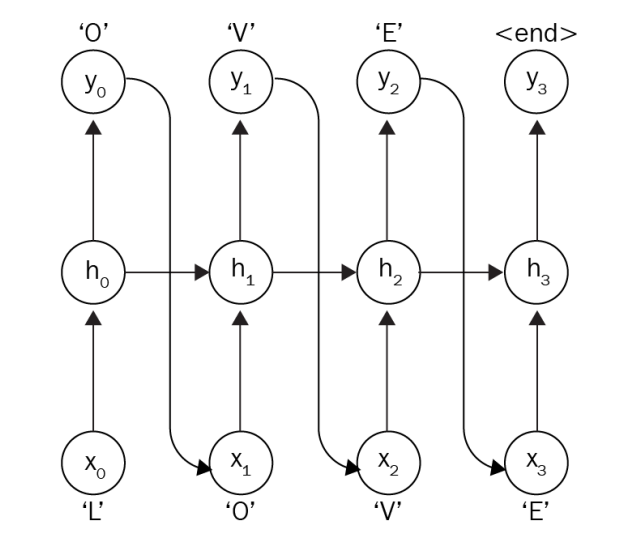

## 2. One-to-many architecture ##

In a one-to-many architecture, a single input is mapped to multiple hidden states and multiple output values, which means RNN takes a single input and maps it to an output sequence. Such application of this architecture is image caption generation.

As shown in the following figure, a single image is passed as an input to the RNN, and at the first time step,t_0 , the word Horse is predicted; on the next time step,t_1 , the previous hidden state Beta_1 is used to predict the next word which is **standing**. Similarly, it continues for a sequence of steps and predicts the next word until the caption is generated:

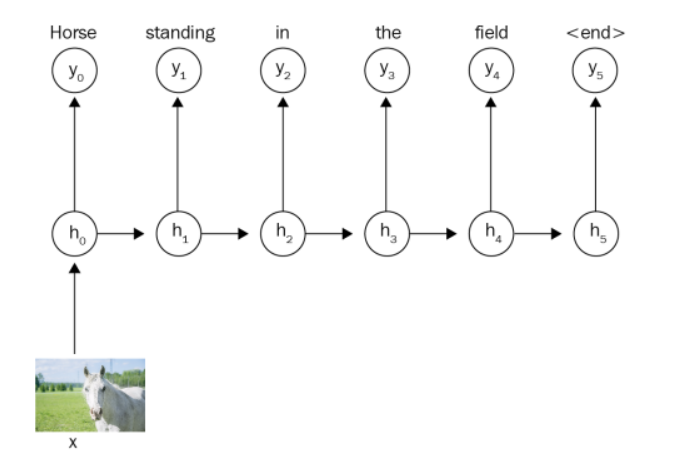



## 3. Many-to-one architecture ##

A many-to-one architecture, as the name suggests, takes a sequence of input and maps it to a single output value. One such popular example of a many-to-one is **sentiment classification**. A sentence is a sequence of words, so on each time step, we pass each word as input and predict the output at the final time step.

As shown in the following figure, at each time step, a single word is passed as an input, along with the previous hidden state; and, at the final time step, it predicts the sentiment of the sentence:

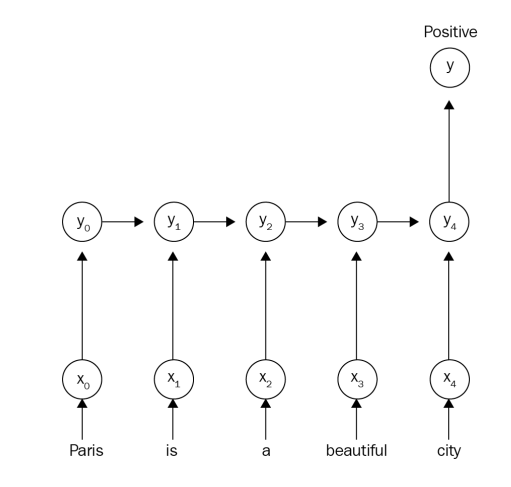


## 4. Many-to-Many architecture ##
In many-to-many architectures, we map a sequence of input of arbitrary length to a sequence of output of arbitrary length. This architecture has been used in various applications. Some of the popular applications of many-to-many architectures include language translation, conversational bots, and audio generation.

Let's suppose that we are converting a sentence from English to French :

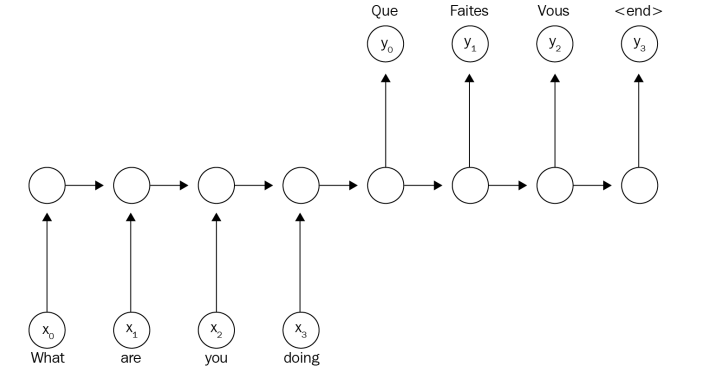






# Summary #

In this chapter covered the fundamentals of Recurrent Neural Networks (RNNs), highlighting how they differ from feedforward networks. RNNs are specialized for sequential data, where predictions depend on the current input and the previous hidden state, effectively storing past information as memory. The chapter explained forward propagation in RNNs and provided a detailed derivation of the Backpropagation Through Time (BPTT) algorithm used for training RNNs. It included practical implementation in TensorFlow, such as generating song lyrics. The chapter concluded with different RNN architectures, like one-to-one, one-to-many, many-to-one, and many-to-many, which are suited for various applications.